# Image file formats
When working with microscopy image data, many file formats are circulating. Most microscope vendors bring proprietary image file formats, image analysis software vendors offer custom and partially open file formats. Traditional file formats exist as well which are supported by common python libraries. For general-purpose image storage, only very few image file formats such as [TIF](https://en.wikipedia.org/wiki/TIFF) can be recommended. Furthermore, formats such as [JPEG](https://en.wikipedia.org/wiki/JPEG) should be avoided to conserve image data integrity.

See also
* [ImageIO](https://github.com/imageio/imageio)
* [AICSImageIO](https://github.com/AllenCellModeling/aicsimageio)
* [napariAICSImageIO](https://github.com/AllenCellModeling/napari-aicsimageio)
* [python-bioformats](https://github.com/CellProfiler/python-bioformats)
* [Moore et al. Nat Methods (2021) "OME-NGFF: a next-generation file format for expanding bioimaging data-access strategies"](https://www.nature.com/articles/s41592-021-01326-w)

In this notebook, we will open a proprietary file format (`.czi`) with a library desgined for that. Thus, we will use the `czifile` library, check links for that [here](https://anaconda.org/conda-forge/czifile) and [here](https://pypi.org/project/czifile/).

If your file format is different, like `.ims`, `.lif`, among others, try checking if there is a library available to open it by searching in [conda-forge](https://conda-forge.org/feedstock-outputs/) or [pipy](https://pypi.org/). Another possibility is to open these files, including `.czi`, directly in napari by having the [napari-aicsimageio plugin](https://github.com/AllenCellModeling/napari-aicsimageio) installed.

In [1]:
import czifile

ModuleNotFoundError: No module named 'czifile'

Here you may get an error from the cell above if you don't have that package installed in your environment. Below we show you how to install this package.

## Installing a new package

This is a general recipe to install packages in a conda environment. Start by openning a second command line (we assume you have one already open, but that one is busy running jupyter lab).

First thing, **very important**, activate your environment with (replace `environment_name` by your environment name):
    
`conda activate environment_name`
    
Here is an example:

![](install_package1.png)

Now we use `conda install` to install the package. Many packages are available from a channel called `conda-forge`, which is the case now, therefore, type the following command now to install czifile library from channel (`-c`) conda-forge:

`conda install -c conda-forge czifile`

After the installation finishes, you can close the second command line and continue here.

## Opening a proprietary file

Now, let's try to import the library again.

In [2]:
import czifile

If it installed correctly, you should have no errors this time.

We can open an image usually by providing a path to it to an `imread` function (this may vary a bit from library to library, check their documentation):

In [3]:
from pathlib import Path
file_path = Path(r"C:\Users\mazo260d\Desktop\Romina_PupalWing_forMarcelo.czi")
image = czifile.imread(file_path)

We usually have access to the image shape like this:

In [4]:
image.shape

(1, 1, 1, 80, 520, 692, 1)

These formats usually have extra dimentions to accomodate many different data shapes. Some possibilities for microscopy data are (more examples in [this thread](https://forum.image.sc/t/reading-czi-file-in-python/39768/11)):
- 'X': 'Width',
- 'Y': 'Height',
- 'C': 'Channel',
- 'Z': 'Slice',  # depth
- 'T': 'Time',
- 'R': 'Rotation',
- 'S': 'Scene',  # contiguous regions of interest in a mosaic image

We know we have a 3D image. One trick to get rid of the unecessary extra dimentions is the [np.squeeze](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html) function.

In [7]:
import numpy as np
image_squeezed = np.squeeze(image)
image_squeezed.shape

(80, 520, 692)

Also, now we have a numpy array (check also [np.asarray](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html)).

In [9]:
type(image_squeezed)

numpy.ndarray

We can now visualize it in napari.

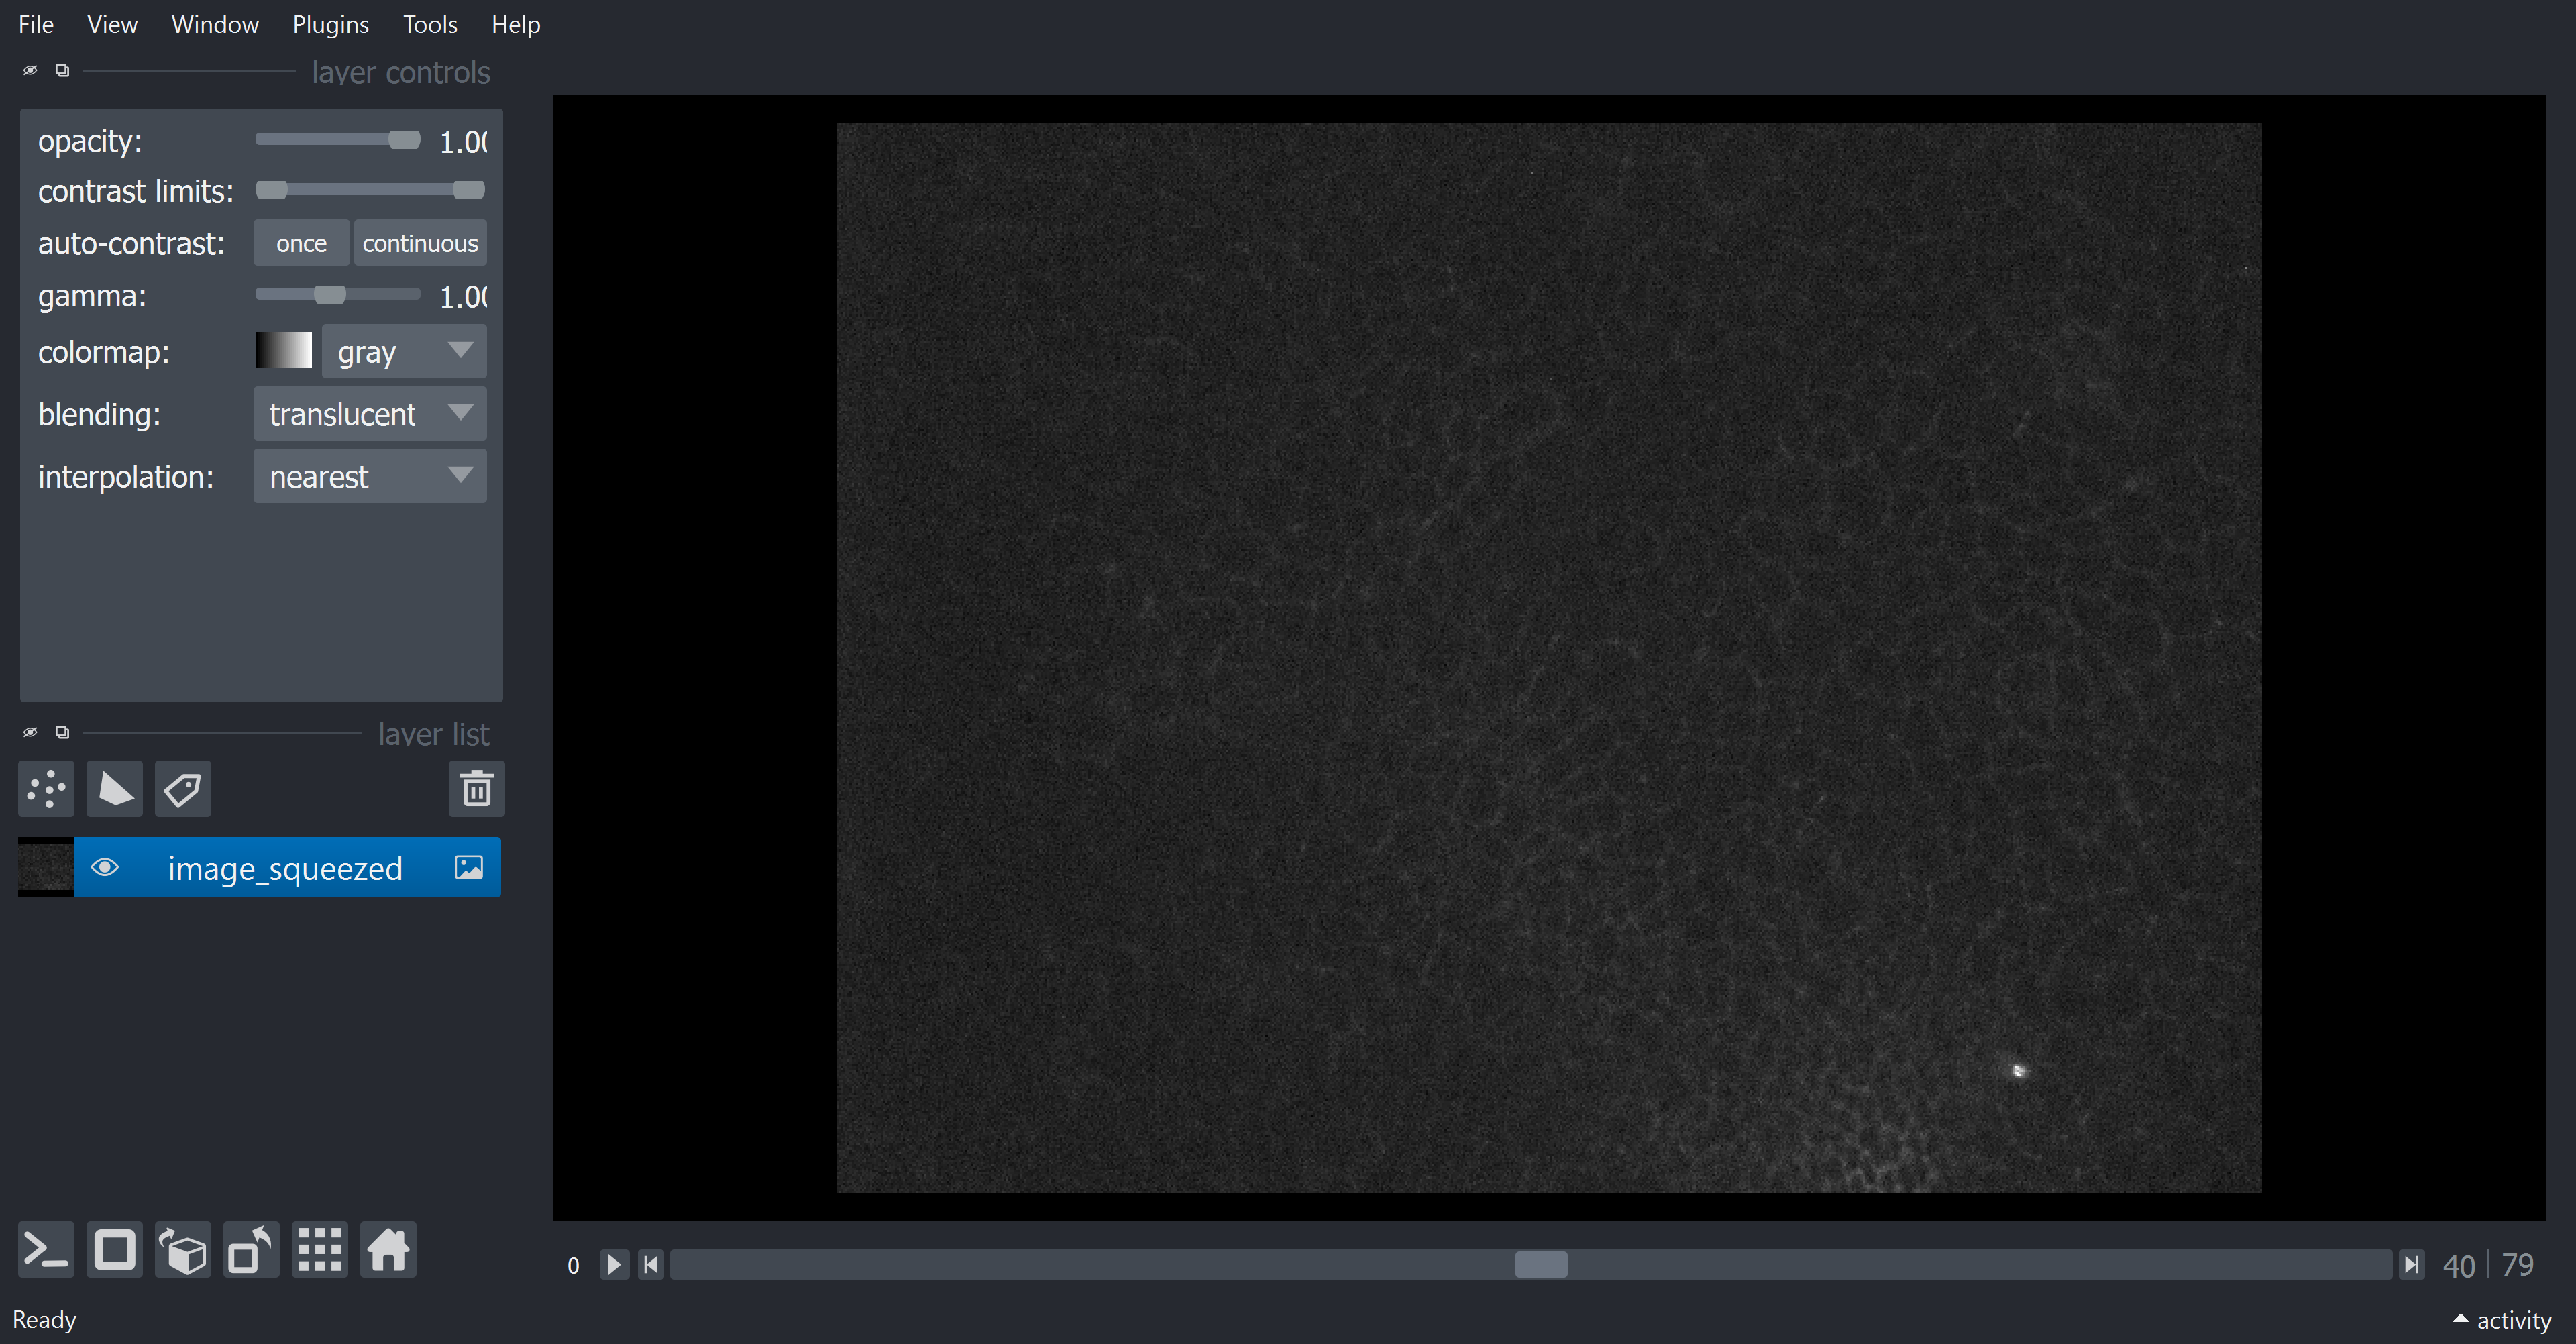

AICSImageIO: Unsupported file format.
AICSImageIO: Unsupported file format.


In [11]:
import napari
from napari.utils import nbscreenshot
viewer = napari.Viewer()
viewer.add_image(image_squeezed)
nbscreenshot(viewer)